In [1]:
import pandas
import hdbscan
import numpy
import seaborn

In [2]:
df = pandas.read_csv("data/similarity.csv")

In [3]:
df.shape

(10844484, 3)

In [4]:
df = df.drop_duplicates(subset=["gene", "compare"], ignore_index=True)
df.shape

(10843849, 3)

In [5]:
df.head()

,gene,compare,similarity
0,NC_000913.3:1977139-1977149(-),NC_000913.3:1977139-1977149(-),1.000000
1,NC_000913.3:1977139-1977149(-),NC_000913.3:2251689-2251699(+),0.910606
2,NC_000913.3:2251689-2251699(+),NC_000913.3:1977139-1977149(-),0.910606
3,NC_000913.3:1977139-1977149(-),NC_000913.3:2557297-2557307(-),0.925595
4,NC_000913.3:2557297-2557307(-),NC_000913.3:1977139-1977149(-),0.925595


In [6]:
df_pivot = df.pivot("gene", "compare", "similarity")
distance_matrix = df_pivot.to_numpy()

In [7]:
distance_matrix.shape

(3293, 3293)

In [8]:
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)

In [9]:
clusterer.fit(distance_matrix)

HDBSCAN(metric='precomputed', min_cluster_size=2)

In [10]:
clusterer.labels_.max()

1

In [11]:
clusterer.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [12]:
unique, counts = numpy.unique(clusterer.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 3264, 0: 27, 1: 2}

<AxesSubplot:ylabel='$\\lambda$ value'>

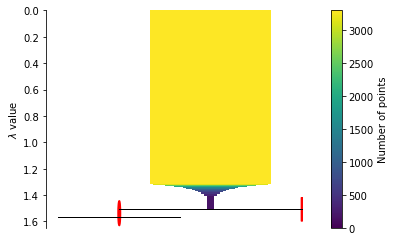

In [13]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [14]:
cluster_df = pandas.DataFrame([df_pivot.index, clusterer.labels_], ["gene", "cluster"]).T

In [15]:
cluster_df[cluster_df["cluster"] != -1].head(30)

,gene,cluster
130,NC_000913.3:1157858-1157868(+),0
147,NC_000913.3:11786-11796(-),0
235,NC_000913.3:1275829-1275839(-),1
247,NC_000913.3:1292922-1292932(-),0
510,NC_000913.3:1629204-1629214(+),0
520,NC_000913.3:1642111-1642121(+),0
601,NC_000913.3:1726648-1726658(+),0
620,NC_000913.3:174882-174892(-),1
783,NC_000913.3:1930747-1930757(-),0
820,NC_000913.3:1986128-1986138(-),0


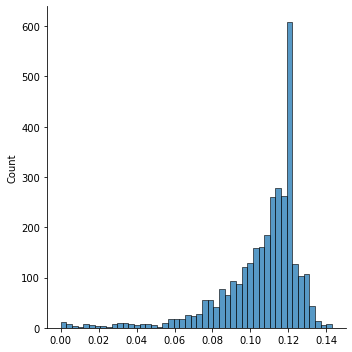

In [16]:
seaborn.displot(clusterer.outlier_scores_[numpy.isfinite(clusterer.outlier_scores_)])

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
cluster = DBSCAN(metric="precomputed", eps=0.65)

In [19]:
cluster.fit(distance_matrix)

DBSCAN(eps=0.65, metric='precomputed')

In [20]:
unique, counts = numpy.unique(cluster.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 3277, 0: 16}

In [21]:
c_df = pandas.DataFrame([df_pivot.index, cluster.labels_], ["gene", "cluster"]).T

In [22]:
c_df[c_df["cluster"] != -1].head(30)

,gene,cluster
130,NC_000913.3:1157858-1157868(+),0
247,NC_000913.3:1292922-1292932(-),0
783,NC_000913.3:1930747-1930757(-),0
1016,NC_000913.3:2237753-2237763(-),0
1054,NC_000913.3:2295586-2295596(-),0
1204,NC_000913.3:2501119-2501129(+),0
1219,NC_000913.3:2522477-2522487(-),0
1312,NC_000913.3:2641804-2641814(-),0
1806,NC_000913.3:3305817-3305827(-),0
1831,NC_000913.3:3333699-3333709(+),0


In [23]:
intersect_df = c_df[c_df["cluster"] != -1][c_df[c_df["cluster"] != -1].gene.isin(cluster_df[cluster_df["cluster"] != -1].gene)]

In [24]:
intersect_df.shape

(15, 2)

In [25]:
intersect_df.head(15)

,gene,cluster
130,NC_000913.3:1157858-1157868(+),0
247,NC_000913.3:1292922-1292932(-),0
783,NC_000913.3:1930747-1930757(-),0
1016,NC_000913.3:2237753-2237763(-),0
1054,NC_000913.3:2295586-2295596(-),0
1204,NC_000913.3:2501119-2501129(+),0
1219,NC_000913.3:2522477-2522487(-),0
1806,NC_000913.3:3305817-3305827(-),0
1831,NC_000913.3:3333699-3333709(+),0
2087,NC_000913.3:363179-363189(-),0


In [31]:
seqs_df = pandas.read_csv("data/Ecoli_K12_MG1655.5UTR.mRNA.seq.cdhit", delimiter="\n", header=None, lineterminator=">")

In [36]:
seqs_df = seqs_df[[0, 1]]
seqs_df.columns = ["names", "seq"]

In [41]:
seqs_df["names"] = seqs_df.names.str.replace("\r", "")
seqs_df["seq"] = seqs_df.seq.str.replace("\r", "")

/mnt/c/Users/Diogo/.virtualenvs/bioinfo2.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/mnt/c/Users/Diogo/.virtualenvs/bioinfo2.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
seqs_df.head()

,names,seq
0,NC_000913.3:1757410-1757420(+),GGTATTAATA
1,NC_000913.3:3210770-3210780(+),TGAGAGGCAC
2,NC_000913.3:1151604-1151614(+),ATTTAAGAGT
3,NC_000913.3:3471329-3471339(-),GAATATAGCC
4,NC_000913.3:1020053-1020063(-),GGCGCAAAAA


In [52]:
df = pandas.merge(cluster_df[cluster_df["cluster"] == 1], seqs_df, left_on="gene", right_on="names")

In [53]:
df.head()

,gene,cluster,names,seq
0,NC_000913.3:1275829-1275839(-),1,NC_000913.3:1275829-1275839(-),GGAGATACCC
1,NC_000913.3:174882-174892(-),1,NC_000913.3:174882-174892(-),GGAACCCTCC


In [54]:
df = pandas.merge(cluster_df[cluster_df["cluster"] == 0], seqs_df, left_on="gene", right_on="names")

In [56]:
df.head(30)

,gene,cluster,names,seq
0,NC_000913.3:1157858-1157868(+),0,NC_000913.3:1157858-1157868(+),ACTCTCAATT
1,NC_000913.3:11786-11796(-),0,NC_000913.3:11786-11796(-),GAGAATCCTT
2,NC_000913.3:1292922-1292932(-),0,NC_000913.3:1292922-1292932(-),GATTACTACA
3,NC_000913.3:1629204-1629214(+),0,NC_000913.3:1629204-1629214(+),GAAAACACCT
4,NC_000913.3:1642111-1642121(+),0,NC_000913.3:1642111-1642121(+),GAGAGTTTTT
5,NC_000913.3:1726648-1726658(+),0,NC_000913.3:1726648-1726658(+),GGGAGCCTTT
6,NC_000913.3:1930747-1930757(-),0,NC_000913.3:1930747-1930757(-),GAGGCTGCAA
7,NC_000913.3:1986128-1986138(-),0,NC_000913.3:1986128-1986138(-),GGAGAGAACC
8,NC_000913.3:2172873-2172883(-),0,NC_000913.3:2172873-2172883(-),AGGAGTTTTT
9,NC_000913.3:2237753-2237763(-),0,NC_000913.3:2237753-2237763(-),GGGGCTTCCC


In [58]:
df = pandas.merge(intersect_df, seqs_df, left_on="gene", right_on="names")

In [59]:
df.head(15)

,gene,cluster,names,seq
0,NC_000913.3:1157858-1157868(+),0,NC_000913.3:1157858-1157868(+),ACTCTCAATT
1,NC_000913.3:1292922-1292932(-),0,NC_000913.3:1292922-1292932(-),GATTACTACA
2,NC_000913.3:1930747-1930757(-),0,NC_000913.3:1930747-1930757(-),GAGGCTGCAA
3,NC_000913.3:2237753-2237763(-),0,NC_000913.3:2237753-2237763(-),GGGGCTTCCC
4,NC_000913.3:2295586-2295596(-),0,NC_000913.3:2295586-2295596(-),GAGGCCGTAA
5,NC_000913.3:2501119-2501129(+),0,NC_000913.3:2501119-2501129(+),GGGAACTTTC
6,NC_000913.3:2522477-2522487(-),0,NC_000913.3:2522477-2522487(-),GCACTTAATT
7,NC_000913.3:3305817-3305827(-),0,NC_000913.3:3305817-3305827(-),AGAAGCCCTC
8,NC_000913.3:3333699-3333709(+),0,NC_000913.3:3333699-3333709(+),GGCTTTTGCG
9,NC_000913.3:363179-363189(-),0,NC_000913.3:363179-363189(-),GAAATCCATT
